<head>
<style>
       p {
           color: red;
           font-size: 20px;
       }
   <\style>
<\head>
<h2>Dry Beans Data Set<\>
    <body>
        <p>Python Pandas Tutorial<\p>
     <\body>


In [56]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../CSS/custom.css", "r").read()
    return HTML(styles)
css_styling()

<h1>Pandas Principle Component Analysis Tutorial<\h1>

<h2>Introduction</h2>

<p class="intro">Python tutorials on youtube can be boring no matter how much useful information the have. In this short series of videos we will encounter CSS, Linux, pure python before stepping into the more esoteric areas of matplot, seaborn, data exploration, PCA analysis and linear regression.<br> The idea is to break down large chunks of learning into managebale bites with some interesting snippets on the way.<br><br>First step, as usual, is to load the libraries required for the project. I have used <strong>pyforest</strong> which loads most of the data science modules in one line but you can follow the usual imports if you like. If you want to use pyforest, install it with pip or conda.<br><strong>pip install pyforest</strong><br><strong>conda install pyforest</strong>
</p>

In [57]:
import pyforest
from IPython.display import IFrame
import re
import sys
sns.set()

<IPython.core.display.Javascript object>

<h3>Basic setup</h3>

<p class="intro"><strong>Project Directory</strong><br>If you have tried to learn python from books or youtube, you may have dived straight in, opened up Jupyter and started coding.<br>It's better to develop good habits from the start and think about a good structure for your project directory.<br>The image below is a screen shot of the directory I am writing this tutorial.<br>I'm running an Anaconda environment on Linux Mint 20. But it is applicable to Winows installations.<br></p>

![Alt text](../img/directory.png "Project Directory Structure")

<p class="intro"><strong>Project Folders</strong><br>It's easier to create a template directory and store it on the desktop. It can then be copied and given a name for your new project. Some of the folders you might want to add are:
    <ul class = "card">
      <li>Data - to store any data files you need - csc, xls etc</li>
      <li>Project Name - to store code you will write</li>
      <li>Img - to hold any images you may want to use</li>
      <li>Modules - write modules to keep your main code from becoming too large</li>
      <li>Tests - you should always run some tests on your code. Store them here.</li>
      <li>I have also a folder for CSS code to style notebooks and a docs folder</li>
    </ul>
<p class="intro">The files you can see are used for git. If you don't have a git account - get one. Share it and save it.<br>The file - requirements.txt - is used to hold the cersions of each package you will be using in your environment. But we can also have a bit of fun here finding out which versions of the main packages we are using and write them out to a file.
</p>

In [58]:
versions = {'Python Version':sys.version,
            'Numpy Verion': np.__version__,
          'Pandas Version': pd.__version__,
          'Seaborn Version': sns.__version__}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
for k,v in versions.items():
    print(k,v)

Python Version 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Numpy Verion 1.21.2
Pandas Version 1.3.3
Seaborn Version 0.11.2


<p class="intro">Find the package names and store them in a python dictionary. Then print them to the console to check the data. I imported and used the <strong>sys</strong> library to find the python version.</p>

In [60]:
def write_versions(versions):
    from pathlib import Path
    if Path('pythonVersions.txt').is_file():
        print ("File exists with these versions.",end='\n\n')
    else:
        with open ('pythonVersions.txt', 'w') as f:  
            for key, value in versions.items():  
                f.write('%s:%s\n' % (key, value))

In [61]:
write_versions(versions)
!cat pythonVersions.txt

File exists with these versions.

Python Version:3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
Numpy Verion:1.20.1
Pandas Version:1.2.4
Seaborn Version:0.11.1


<p class="intro">Our first function, <strong>write_versions</strong> uses the <strong>Path</strong> module from the <strong>pathlib</strong> library to check if a file already exists. If itexists it does nothing otherwise it will write the data to the file "pythonversions.txt".<br>A little trick is to use a system command, in this case <strong>cat</strong>, to print the contents of the file.<br>Cat is a linux command, so this will not work on Windows. Comment it out if you need to.</p>

## Data Source

<p class="intro">The data is from the UCI Machine Learning Repository which contains a wealth of good data for learning. I have chosen a small, clean file to practice on. It is a classification problem which attempts to identify bean types from camera data. Read about it below.</p>

In [62]:
DataSource = IFrame(src='https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset#', width=1000, height=200)
display(DataSource)

In [63]:
path = '../Data/DryBeanDataset'

df = pd.read_excel(path + '/Dry_Bean_Dataset.xlsx')

from sklearn.utils import shuffle

# shuffle the dataframe
df = shuffle(df, random_state=0)
df.reset_index(inplace=True, drop=True)

pd.set_option('precision',2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data exploration

In [64]:
for i in range(len(df.columns)):
    print(i,'  ',df.columns[i])

0    Area
1    Perimeter
2    MajorAxisLength
3    MinorAxisLength
4    AspectRation
5    Eccentricity
6    ConvexArea
7    EquivDiameter
8    Extent
9    Solidity
10    roundness
11    Compactness
12    ShapeFactor1
13    ShapeFactor2
14    ShapeFactor3
15    ShapeFactor4
16    Class


<p class="intro">I personally don't like uppercase letters in column names unless they are absolutely necessary.<br>
I don't like the column called class - it could cause a namespace conflict if we decide to build any classes further down the line.<br>
Lets remove all the upper case letter using list comprehension and <strong>str.lower.</strong><br>
Then change class to bean.<br>
I've already set the display precision of floats to 2 to make things easier to read.</p>

In [65]:
df.columns = [str.lower(df.columns[i]) for i in range(len(df.columns))]

In [66]:
df.rename(columns={'class' : 'bean'}, inplace=True)
df.head()

area  perimeter  majoraxislength  minoraxislength  aspectration  \
0  37277     710.19           264.79           179.81          1.47   
1  28942     638.82           239.86           154.00          1.56   
2  38290     719.89           270.45           180.51          1.50   
3  37641     742.54           284.31           169.74          1.67   
4  50172     828.97           316.45           202.27          1.56   

   eccentricity  convexarea  equivdiameter  extent  solidity  roundness  \
0          0.73       37684         217.86    0.80      0.99       0.93   
1          0.77       29368         191.96    0.79      0.99       0.89   
2          0.74       38605         220.80    0.76      0.99       0.93   
3          0.80       38112         218.92    0.74      0.99       0.86   
4          0.77       50547         252.75    0.69      0.99       0.92   

   compactness  shapefactor1  shapefactor2  shapefactor3  shapefactor4  \
0         0.82      7.10e-03      2.01e-03          0.68          1.00   
1         0.80      8.29e-03      2.10e-03          0.64          1.00   
2         0.82      7.06e-03      1.94e-03          0.67          1.00   
3         0.77      7.55e-03      1.64e-03          0.59          0.99   
4         0.80      6.31e-03      1.58e-03          0.64          1.00   

       bean  
0  DERMASON  
1  DERMASON  
2  DERMASON  
3      SIRA  
4     SEKER

<p class="intro">We will be trying to classify beans based on the characteristics in the DF so we need to have a look at what type of beans we are dealing with. It is easy to use <strong>value.counts</strong> to analyse them.</p>

In [67]:
df.bean.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: bean, dtype: int64

<p class="intro">We will want to collect the bean types and store them in a list variable for later</p>

In [68]:
bean_labels = df.bean.unique()
bean_labels

array(['DERMASON', 'SIRA', 'SEKER', 'CALI', 'BOMBAY', 'HOROZ', 'BARBUNYA'],
      dtype=object)

<p class="intro">Let's have a look at some of the beans we are measuring. This is the first foray into the world of data plotting but in this case it will be images that are plotted. We need to use matplotlib subplots to show 3 images to the screen. The function below will do most of the 'dirty' work for us. The format for the add subplot is <strong>(NoRows, Nocolumns, column position)</strong> The grid is switched off by setting the sns style to dark. Use <strong>set_axis_off</strong> to get rid of the X & Y axis points.</p>

In [69]:
def show_img(img, bean,pos):
    '''img = numpy array from npimg.read
       bean = string for the plot title
       pos = integer column position for plot
       returns nothing plots the image'''
    ax = fig.add_subplot(1, 3, pos)
    imgplot = plt.imshow(img)
    ax.set_title(bean)
    ax.set_axis_off()
    fig.add_axes(ax)


<p class="intro">You will have to <strong>import matplotlib.image</strong> to load the images and then pass them to the function <strong>show_img.</strong> Set sns style to dark to remove grid lines. Call the function with the image, title and column position.</p>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

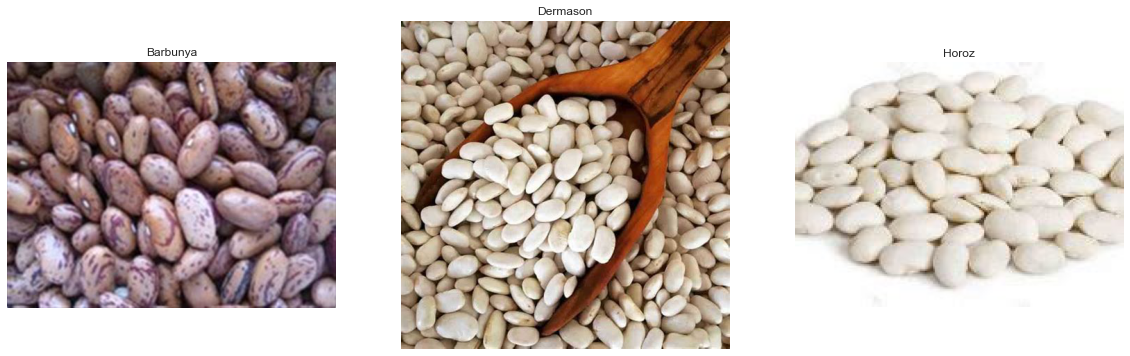

In [70]:
%matplotlib inline
import matplotlib.image as mpimg
img1 = mpimg.imread("../img/barbunya.jpg")
img2 = mpimg.imread("../img/dermason.jpg")
img3 = mpimg.imread("../img/horoz.jpg")
sns.set_style('dark')

fig = plt.figure(figsize=(20,20))
show_img(img1,'Barbunya',1)
show_img(img2,'Dermason',2)
show_img(img3,'Horoz',3);

<p class="intro">We can have a look at the data in more detail by using the pandas <strong>describe()</strong> method.<br>
This data set is very clean which makes it easier to follow what is happening and to aid learning.</p>

In [71]:
df.describe()

area  perimeter  majoraxislength  minoraxislength  aspectration  \
count   13611.00   13611.00         13611.00         13611.00      13611.00   
mean    53048.28     855.28           320.14           202.27          1.58   
std     29324.10     214.29            85.69            44.97          0.25   
min     20420.00     524.74           183.60           122.51          1.02   
25%     36328.00     703.52           253.30           175.85          1.43   
50%     44652.00     794.94           296.88           192.43          1.55   
75%     61332.00     977.21           376.50           217.03          1.71   
max    254616.00    1985.37           738.86           460.20          2.43   

       eccentricity  convexarea  equivdiameter    extent  solidity  roundness  \
count      13611.00    13611.00       13611.00  13611.00  1.36e+04   13611.00   
mean           0.75    53768.20         253.06      0.75  9.87e-01       0.87   
std            0.09    29774.92          59.18      0.05  4.66e-03       0.06   
min            0.22    20684.00         161.24      0.56  9.19e-01       0.49   
25%            0.72    36714.50         215.07      0.72  9.86e-01       0.83   
50%            0.76    45178.00         238.44      0.76  9.88e-01       0.88   
75%            0.81    62294.00         279.45      0.79  9.90e-01       0.92   
max            0.91   263261.00         569.37      0.87  9.95e-01       0.99   

       compactness  shapefactor1  shapefactor2  shapefactor3  shapefactor4  
count     13611.00      1.36e+04      1.36e+04      13611.00      1.36e+04  
mean          0.80      6.56e-03      1.72e-03          0.64      9.95e-01  
std           0.06      1.13e-03      5.96e-04          0.10      4.37e-03  
min           0.64      2.78e-03      5.64e-04          0.41      9.48e-01  
25%           0.76      5.90e-03      1.15e-03          0.58      9.94e-01  
50%           0.80      6.65e-03      1.69e-03          0.64      9.96e-01  
75%           0.83      7.27e-03      2.17e-03          0.70      9.98e-01  
max           0.99      1.05e-02      3.66e-03          0.97      1.00e+00

<p class="intro">We can drop in another bit of Linux to remind ourselves what the columns refer to.
To reiterate. the data comes from camera measurements
We can use a magic command <strong>%%bash</strong> to run <strong>sed..<br></strong>
<strong>This won't work on Windows!</strong> </p>

In [72]:
%%bash
sed -n 52,70p ../Data/DryBeanDataset/Dry_Bean_Dataset.txt

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.
2.) Perimeter (P): Bean circumference is defined as the length of its border.
3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5.) Aspect ratio (K): Defines the relationship between L and l.
6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11.)Roundness (R): Calculated with the following for

<h3>Visualising the data</h3>

<p class="intro">The data as downloaded is very clean and there is no need to go through a whole lot of data wrangling.<br>The data are created from camera information presumably so that they can be sorted into different types in the production process. The target for a mulitvariate analysis will, of course, be <strong>'bean'</strong>.<br>To get a better idea of how each bean type relates to the camera data, we can graph some of the relationships. It may be that not all measurements are necessary to classify a bean.</p>


<p class="intro">The easy way to viualise relationships is using a simple <strong>df.plot</strong>. One important point for me anyway, is to make sure that the Y axis is clearly labelled to show just what we are measuring. I have seen too many plots where the plot is misleading because of a poor or purposefully misleading Y axis labelling. The title, Xlabel and Ylabel have been simply coded using **plt** statements which in this case are self explanatory.<br>Interestingly there are <strong>4  Shape Factors</strong> which have no clear descriptions. We don't know what the measurements refer to and how they relate to each bean type. Let's have a look at them first.</p>

<h4>DF Plots</h4>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

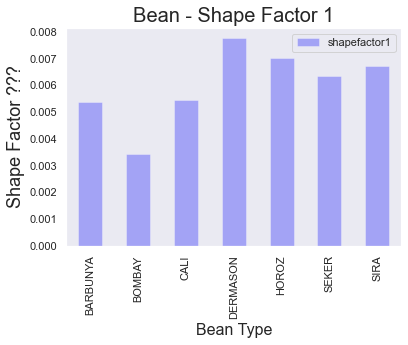

In [73]:
%matplotlib inline
dftemp1 = pd.DataFrame(df.groupby(['bean']).agg('shapefactor1').mean())
dftemp1.plot(kind='bar', color='blue', alpha=0.3)
plt.title('Bean - Shape Factor 1', fontsize=20)
plt.xlabel('Bean Type', fontsize=16)
plt.ylabel('Shape Factor ???', fontsize=18);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

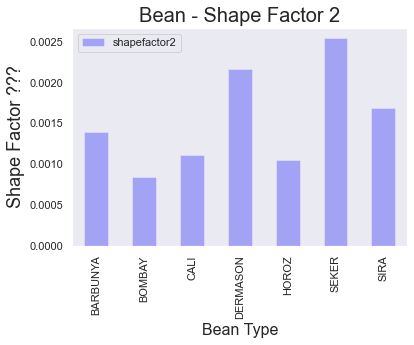

In [74]:
dftemp1 = pd.DataFrame(df.groupby(['bean']).agg('shapefactor2').mean())
dftemp1.plot(kind='bar', color='blue', alpha=0.3)
plt.title('Bean - Shape Factor 2', fontsize=20)
plt.xlabel('Bean Type', fontsize=16)
plt.ylabel('Shape Factor ???', fontsize=18);

<p class="intro">There are clear differences. But since we don't know the measurements, let's ignore them for now.<br>Maybe a Correleation plot can give a bit more of an insight.<br>But first we should drop all the <strong>shapefactor</strong> columns and create a new DF leaving the original untouched.</p>

In [75]:
df_minus_shapefactor = df.drop(['shapefactor1','shapefactor2','shapefactor3','shapefactor4'],axis=1)
df_minus_shapefactor.head()

area  perimeter  majoraxislength  minoraxislength  aspectration  \
0  37277     710.19           264.79           179.81          1.47   
1  28942     638.82           239.86           154.00          1.56   
2  38290     719.89           270.45           180.51          1.50   
3  37641     742.54           284.31           169.74          1.67   
4  50172     828.97           316.45           202.27          1.56   

   eccentricity  convexarea  equivdiameter  extent  solidity  roundness  \
0          0.73       37684         217.86    0.80      0.99       0.93   
1          0.77       29368         191.96    0.79      0.99       0.89   
2          0.74       38605         220.80    0.76      0.99       0.93   
3          0.80       38112         218.92    0.74      0.99       0.86   
4          0.77       50547         252.75    0.69      0.99       0.92   

   compactness      bean  
0         0.82  DERMASON  
1         0.80  DERMASON  
2         0.82  DERMASON  
3         0.77      SIRA  
4         0.80     SEKER

<h4>Correlation Plot</h4>

<p class="intro">You can learn more about correlation from the website below. Essentially it is the linear relationship between 2 variables. Often 2 highly correlated variable may not be essential for further analysis but that is not always the case. Our plot will use the df minus the shape factor variables.</p>

In [76]:
corrinfo = IFrame(src='https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/', width=1000, height=300)
display(corrinfo)

<p class="intro">Seaborn makes plotting a correlation matrix easy. Use the pandas .corr() method passed into the plot. It is then easy to see which variables are highly positively correlated (close to 1), highly negatively correlated (close to -1)<br>I would advise using a different colour map to the standard one. This one is particularly easier to read!</p>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

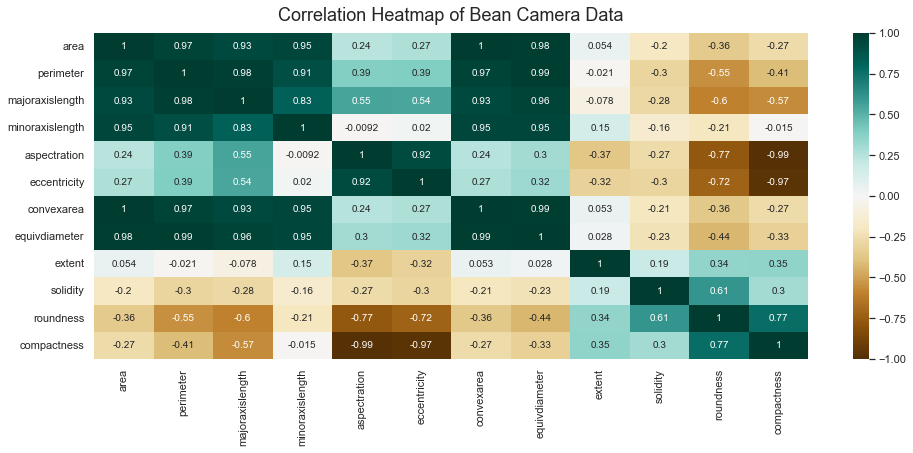

In [77]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_minus_shapefactor.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap of Bean Camera Data', fontdict={'fontsize':18}, pad=12);

<h4>Sub Plots of each Variable</h4>

<p class="intro">Now that we know how the variables correlate with each other, it is good to know how they individually relate to the target category 'bean'. There looks like a lot of code for this plot but really the major differences are the Y axis variables and the title.<br>Subplots are again used but this time the format is just (NoRows, NoCols). <strong>ax</strong> defines in which row and column the plot will be placed. I'm using box plots to visualise each beans relation.</p>

![alt text](../img/box-and-whisker-plot.png)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

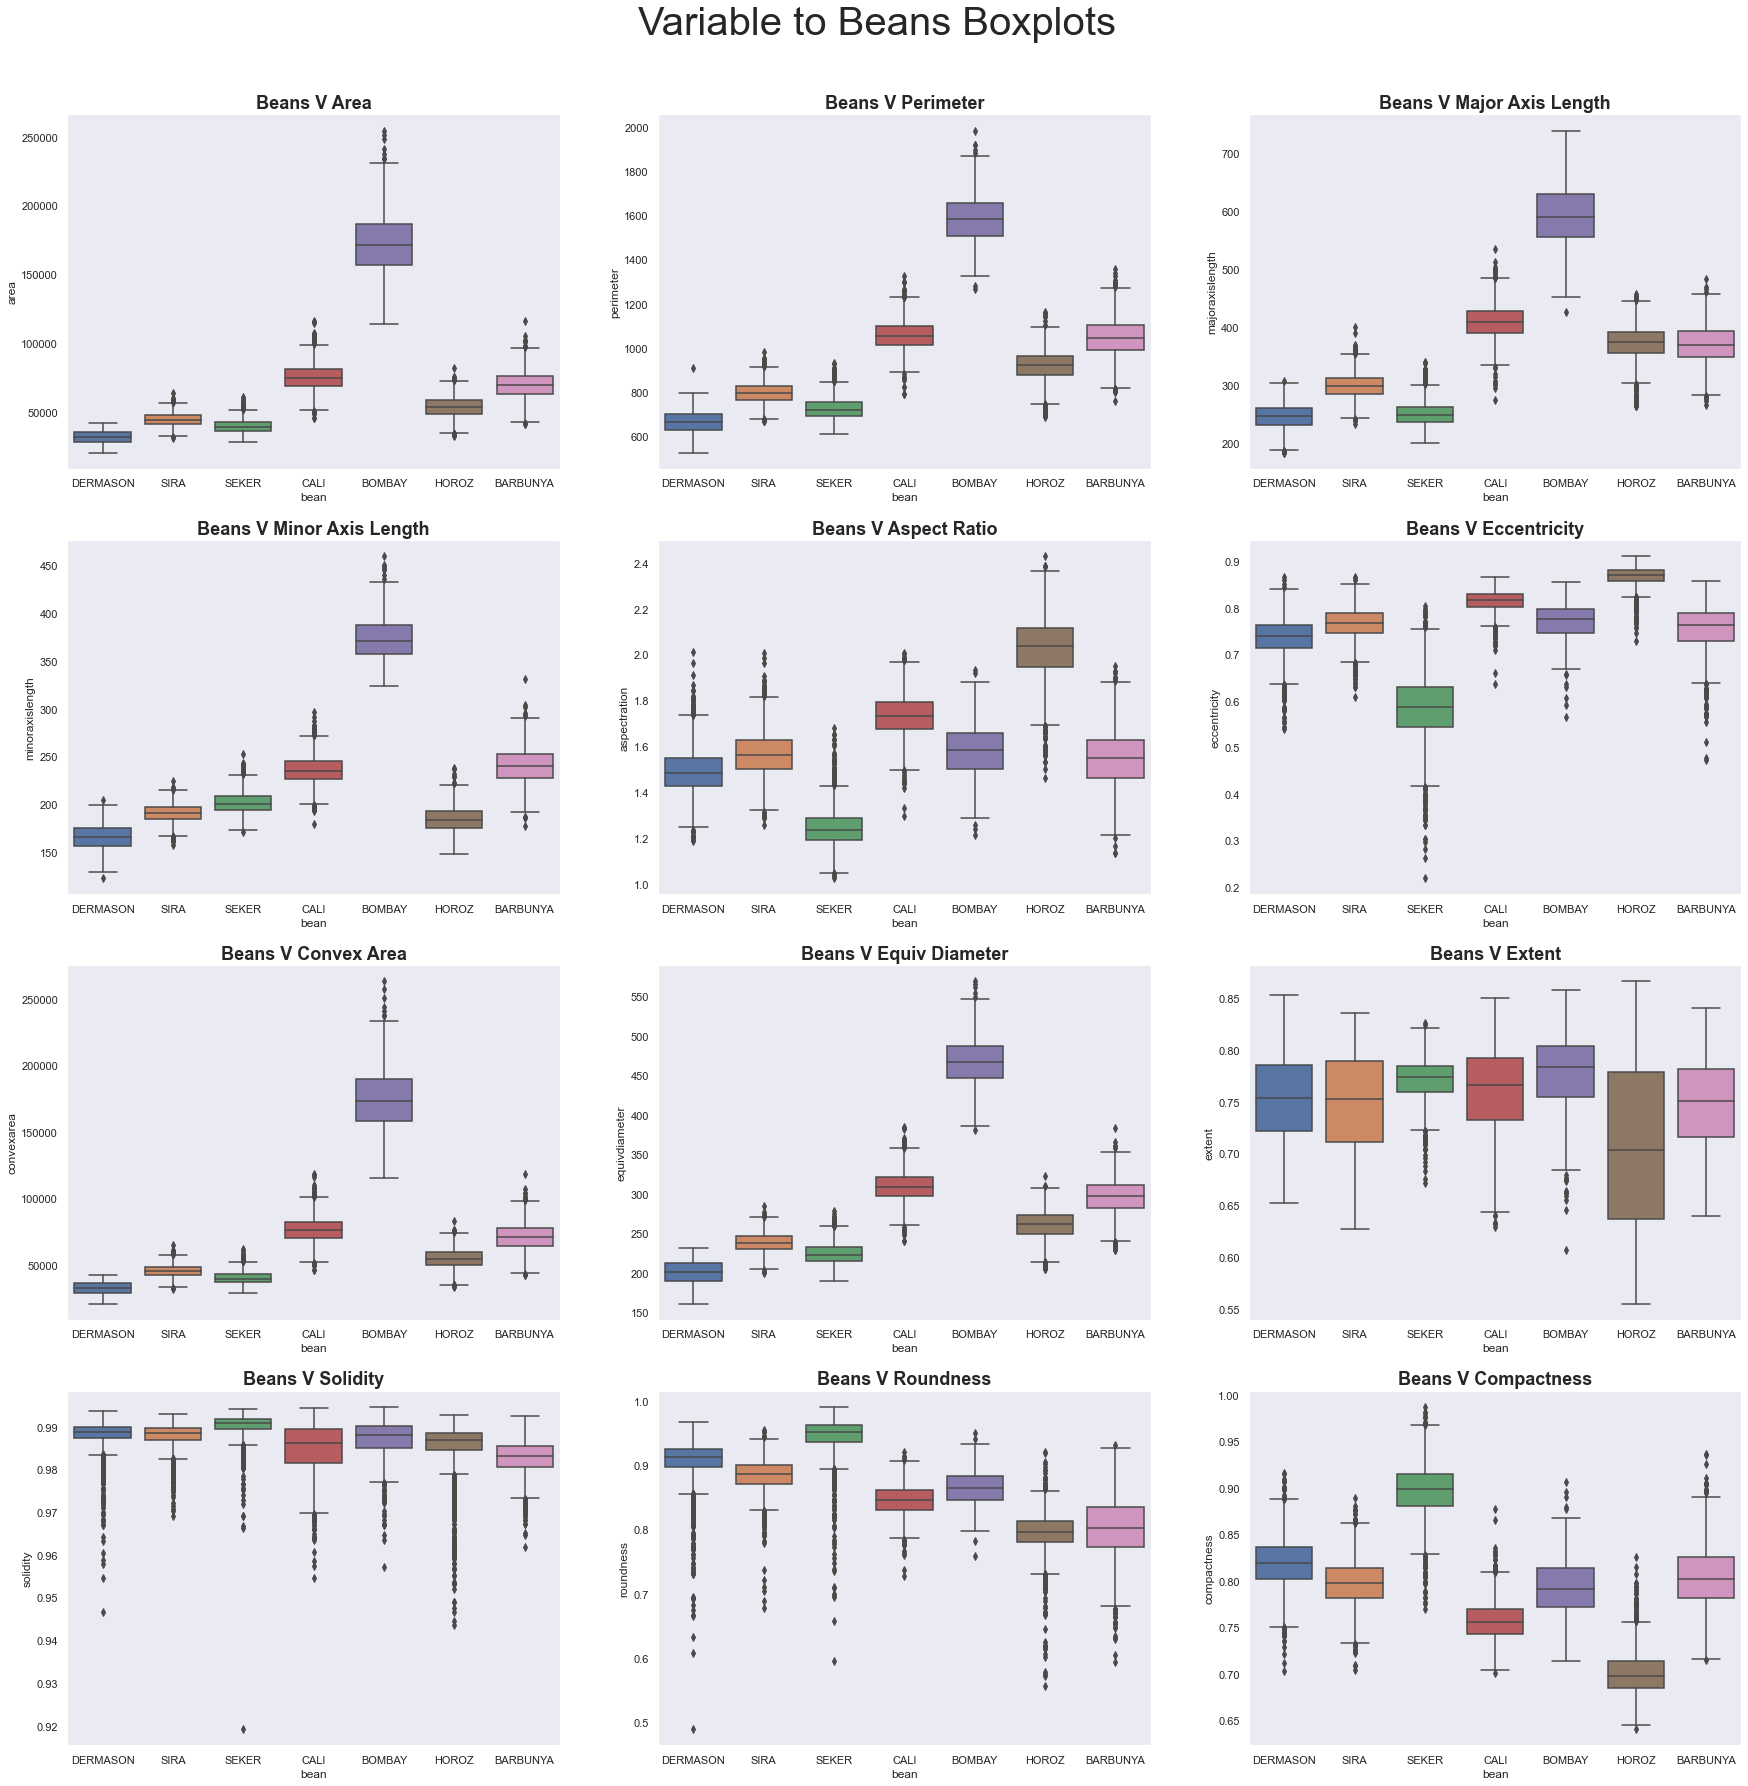

In [78]:
fontdict1={'fontsize': 18,
          'weight' : 'bold',
         'horizontalalignment': 'center'}
fig, axes = plt.subplots(4, 3, figsize=(30, 30), sharex=False)
fig.suptitle('Variable to Beans Boxplots',fontsize=40, y=0.93)

sns.boxplot(ax=axes[0,0],x="bean", y="area", data=df).set_title('Beans V Area', fontdict=fontdict1)
sns.boxplot(ax=axes[0,1],x="bean", y="perimeter", data=df).set_title('Beans V Perimeter',fontdict=fontdict1)
sns.boxplot(ax=axes[0,2],x="bean", y="majoraxislength", data=df).set_title('Beans V Major Axis Length',fontdict=fontdict1)
#
sns.boxplot(ax=axes[1,0],x="bean", y="minoraxislength", data=df).set_title('Beans V Minor Axis Length',fontdict=fontdict1)
sns.boxplot(ax=axes[1,1],x="bean", y="aspectration", data=df).set_title('Beans V Aspect Ratio',fontdict=fontdict1)
sns.boxplot(ax=axes[1,2],x="bean", y="eccentricity", data=df).set_title('Beans V Eccentricity',fontdict=fontdict1)
#
sns.boxplot(ax=axes[2,0],x="bean", y="convexarea", data=df).set_title('Beans V Convex Area',fontdict=fontdict1)
sns.boxplot(ax=axes[2,1],x="bean", y="equivdiameter", data=df).set_title('Beans V Equiv Diameter',fontdict=fontdict1)
sns.boxplot(ax=axes[2,2],x="bean", y="extent", data=df).set_title('Beans V Extent',fontdict=fontdict1)

sns.boxplot(ax=axes[3,0],x="bean", y="solidity", data=df).set_title('Beans V Solidity',fontdict=fontdict1)
sns.boxplot(ax=axes[3,1],x="bean", y="roundness", data=df).set_title('Beans V Roundness',fontdict=fontdict1)
sns.boxplot(ax=axes[3,2],x="bean", y="compactness", data=df).set_title('Beans V Compactness',fontdict=fontdict1);


<p class="intro">From the above graph we can already see that there is a good spread of variables that can be used to recognise the different varieties of beans. It is worthwhile plotting 2 variables together to see if there is some sort of group pattern which emerges. Use the <strong>sns.kdeplot()</strong> and look at <strong>area</strong> and <strong>eccentricity</strong> as a start.</p>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

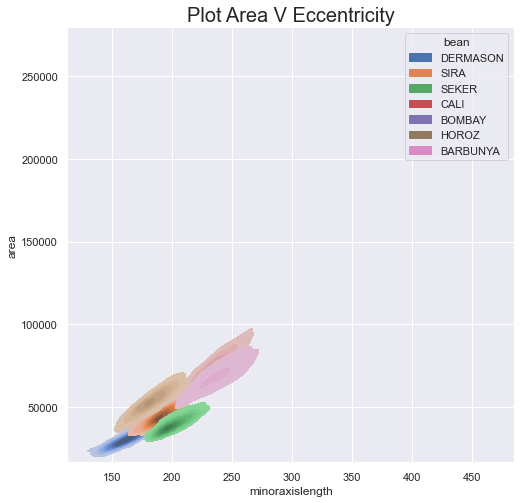

In [79]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
plt.grid()
plt.title('Plot Area V Eccentricity', fontsize=20)
sns.kdeplot(data=df_minus_shapefactor, y='area', x='minoraxislength', hue='bean', fill=True);

<p class="intro">We can clearly see where each bean is in relation to the 2 variables. But they overlap too much to be useful for classification. We will have a foray into the world of Principal Component Analysis for a closer look.</p>

<h2>Principal Component Analysis</h2>

<p class="intro">PCA is a technique used for the identification of a smaller number of uncorrelated variables known as principal components from a larger set of data. The beans data set has 12 variables to identify the target bean. PCA will help us to identify which variables have most effect on classifying our bean.<br><br>"Instead of your original variables, you get the same number of new ‘composite’ variables back. The difference being that before you performed the PCA, the variables you had might be correlated to one another. What PCA attempts is to produce completely uncorrelated variables which are called Principal Components. Furthermore, the Principal Components themselves are ordered such that the first component captures the largest amount of variance in the data set as possible, the second the next highest level of variance and so on."<br><br>This is a quote from the article below which is well worth a read.</p>

In [80]:
DataSource = IFrame(src='https://firefinch.io/a-simple-introduction-to-pca/', width=900, height=200)
display(DataSource)

<p class="intro">We will use the <strong>df_minus_shape_factor</strong> for the values and <strong>df.bean</strong> for the <strong>target</strong> values.<br>
The data need to be scaled first. This is important. Variables with big values will have more influence. They all need to be singing from the same hymn book as it were. Use the <strong>sklearn</strong> library and its modules. I will be using StandardScaler and PCA modules. there are various names for scaling which are all slightly different methods. Look out for words like <strong>normalizing, standardization</strong>. Look them up and find out what the differences are. <strong>StandardScaler</strong> as used here is akin to a Z score. The formula being x<sub>standardised</sub> = (x - mean) / std<br> See below for a visual description</p>

![alt text](../img/zscore.png)

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<p class="intro">One of the great things about modern IDE's is that you can do away with variable names like <strong>X,y,x,Y</strong> which I find difficult to distinguish on the screen. If you can give a variable a recognisable name then use it. Your IDE will prompt you. You will see many tutorials usin X or y. Copy and use them if you want, but I prefer real names! I will use some inline comments now to help guide me through the PCA process.</p>

<h3>Scaling the data</h3>

In [82]:
##First - create a numpy array of the feature varaibles
##In this case we have columns 1-12. NB the index column is removed as well as the "bean" classification
bean_features = df_minus_shapefactor[df_minus_shapefactor.columns[1:12]].values

##The target column is the "bean" column
target = df_minus_shapefactor[df_minus_shapefactor.columns[12:13]].values

##Now we standardise the values into the numpy array - bean_features_standard
bean_features_standard = StandardScaler().fit_transform(bean_features)

<p class="intro">It is worthwhile to show 2 plots of how we have manipulated the data to help understand what we have just done.</p>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

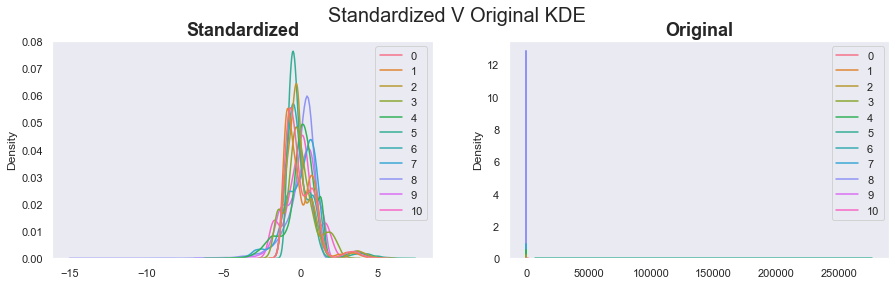

In [83]:
fig,axs = plt.subplots(1,2,figsize=(15, 4), sharex=False, sharey=False)
fig.suptitle('Standardized V Original KDE',fontsize=20, y=1)
sns.kdeplot(ax=axs[0], data=bean_features_standard).set_title('Standardized', fontdict=fontdict1)
sns.kdeplot(ax=axs[1], data=bean_features).set_title('Original', fontdict=fontdict1);

<p class="intro">This shows how the data has been centered and scaled!!</p>

<p class="intro">You will see examples using <strong>X</strong> and <strong>y</strong>for making analyses where ever you see examples on the internet. In our case <strong>bean_features_standard</strong> will be <strong>X</strong> and <strong>target</strong>will be <strong>y</strong>.<br>I hope using names for the variables will make what we are doing a bit more clear. Remember. <strong>bean_features_standard</strong> is just the values of each figure from <strong>df_minus_shapefactor</strong> standardises using StandardScaler. <strong>target</strong> is just the bean types column from the same DF.</p>

<h3>Calculating PCA</h3>

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)

principalComponents = pca.fit_transform(bean_features_standard)

df_PCA12 = pd.DataFrame(data = principalComponents
             , columns = ['pca_1', 'pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9' ,'pca_10','pca_11'])

<IPython.core.display.Javascript object>

In [85]:
df_PCA12['bean'] = df_minus_shapefactor['bean']

In [86]:
df_PCA12.describe()

pca_1     pca_2     pca_3     pca_4     pca_5     pca_6     pca_7  \
count  1.36e+04  1.36e+04  1.36e+04  1.36e+04  1.36e+04  1.36e+04  1.36e+04   
mean   2.74e-17  3.67e-17  6.77e-19  1.16e-17 -3.94e-17 -9.93e-18 -1.11e-18   
std    2.45e+00  1.72e+00  9.84e-01  8.73e-01  4.41e-01  2.64e-01  1.32e-01   
min   -5.09e+00 -5.58e+00 -2.46e+00 -2.83e+00 -2.94e+00 -9.99e-01 -2.73e-01   
25%   -1.99e+00 -9.52e-01 -5.85e-01 -6.01e-01 -2.47e-01 -1.64e-01 -8.62e-02   
50%   -5.31e-01 -1.32e-01 -1.35e-01 -4.17e-02 -5.76e-02 -8.59e-02 -1.61e-02   
75%    1.97e+00  8.20e-01  4.05e-01  6.36e-01  2.26e-01  1.39e-01  6.45e-02   
max    1.11e+01  7.95e+00  1.36e+01  4.53e+00  3.26e+00  2.25e+00  1.27e+00   

          pca_8     pca_9    pca_10    pca_11  
count  1.36e+04  1.36e+04  1.36e+04  1.36e+04  
mean   1.25e-17  9.56e-18  3.80e-18  1.19e-17  
std    5.44e-02  2.76e-02  1.58e-02  5.21e-03  
min   -4.57e-01 -1.73e-01 -1.74e-01 -4.21e-02  
25%   -2.40e-02 -1.67e-02 -6.22e-03 -2.54e-03  
50%    9.58e-04 -2.87e-04 -9.71e-04  7.12e-05  
75%    1.81e-02  1.53e-02  6.49e-03  2.87e-03  
max    6.34e-01  4.88e-01  2.09e-01  4.62e-02

<h3>Explained Variance</h3>

<p class="intro">There are 2 methods of determining the explained variance. One from the pca library and one from the pandas library. How do they compare?</p>

In [87]:
explained_variance = pca.explained_variance_
explained_variance.round(2)

array([6.03, 2.96, 0.97, 0.76, 0.19, 0.07, 0.02, 0.  , 0.  , 0.  , 0.  ])

/tmp/ipykernel_61625/2262265023.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<IPython.core.display.Javascript object>

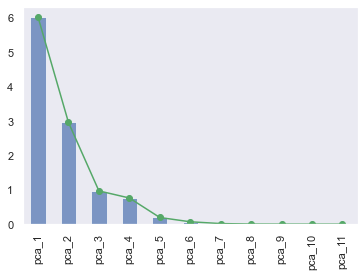

In [88]:
df_PCA12.var().plot(kind ='bar',alpha=0.7)
plt.plot(explained_variance, color='g',marker='o');

In [89]:
pca_variance = df_PCA12.var()
for i in range(0,11):
    print(f'PCA{i+1} accounts for {round(pca_variance[i]*10,1)}% of variance')

PCA1 accounts for 60.3% of variance
PCA2 accounts for 29.6% of variance
PCA3 accounts for 9.7% of variance
PCA4 accounts for 7.6% of variance
PCA5 accounts for 1.9% of variance
PCA6 accounts for 0.7% of variance
PCA7 accounts for 0.2% of variance
PCA8 accounts for 0.0% of variance
PCA9 accounts for 0.0% of variance
PCA10 accounts for 0.0% of variance
PCA11 accounts for 0.0% of variance


/tmp/ipykernel_61625/2252490582.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<h3>Outliers</h3>

<p class="intro">You may notice that the maximum value for PCA 3 is 13.6. This looks like a high outlier. We can have a look at the distributions for PCA 3.</p>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

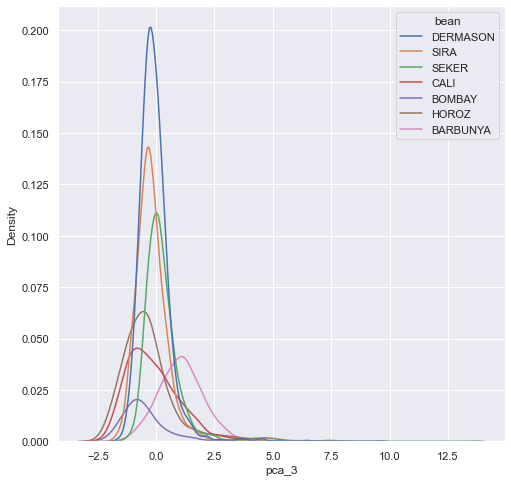

In [90]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.grid()
sns.kdeplot(data=df_PCA12, x='pca_3', hue='bean');

<p class="intro">PCA 3 has a few outliers. Lets see how many are above 4</p>

In [91]:
len(df_PCA12.query('pca_3 > 4.0'))

77

<p class="intro">So 77 data points out of 13k + are above 4.0. I think we can get rid of these as they are definitely outliers.</p>

In [92]:
df_PCA12 = df_PCA12[df_PCA12['pca_3'] <= 4.0]

<h3>3D Plotting</h3>

<p class="intro">The easiest way to view the PCA produced in 3D is to use Plotly Express. You can use Matplot but I found it hard to associate a color to each bean type although no doubt it is possible. PX has less options but easily produces a graph. Although the main drawback I found was scaling symbol sizes.</p>

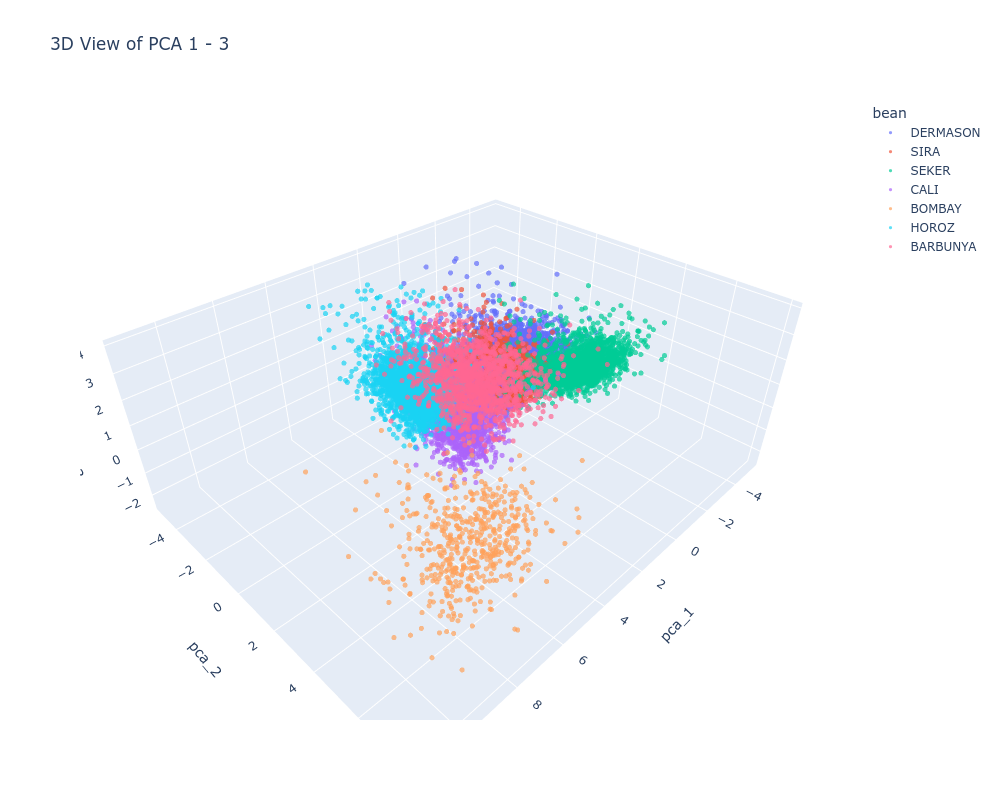

In [95]:
import plotly.express as px
fig = px.scatter_3d(df_PCA12,
                    x='pca_1',
                    y='pca_2',
                    z='pca_3', 
                    color='bean',
                    opacity=0.7,
                    width=1000,
                    height=800,
                    title='3D View of PCA 1 - 3') 
fig.update_traces(marker={'size': 3})
fig.show()

<p class="intro">Lets have a look at PCA 1 against PCA2 and see if there is good <strong>'bean'</strong> separation.</p>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

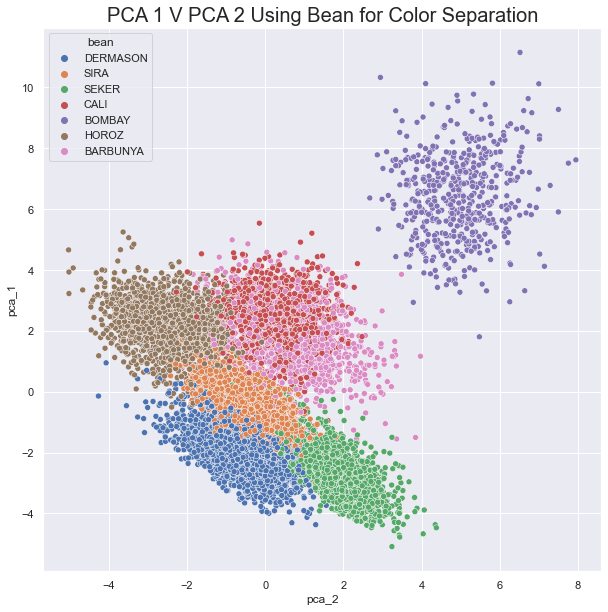

In [98]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.grid()
plt.title('PCA 1 V PCA 2 Using Bean for Color Separation', fontsize=20)
sns.scatterplot(data=df_PCA12, y='pca_1', x='pca_2', hue='bean')
plt.show()

<p class="intro">If you remember, I dropped the variables <strong>shapefactor</strong> from at the start of the lesson. It would be interesting to see how they plotted.</p>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

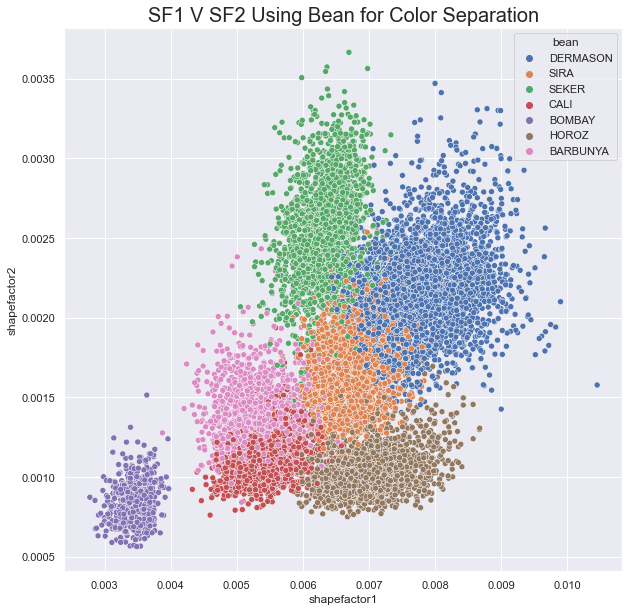

In [97]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.grid()
plt.title('SF1 V SF2 Using Bean for Color Separation', fontsize=20)
sns.scatterplot(data=df, y='shapefactor2', x='shapefactor1', hue='bean')
plt.show()

<p class="intro">Interestingly we can see that the <strong>shapefactor</strong> may have been calculated using some sort of PCA analysis! There is a problem differentiating between Barbunya and Cali beans. We can look at this in the next section</p>

<h3>PCA reduces dimensionality</h3>

<p class="intro">Using PCA has enabled the reduction of 11 variables down to the 2 or 3 which describe the most variation between our different beans.<br>Imagine you have a data set with 30 or 100 variable. You can reduce the complexity of the data set and reduce the computation power for analysis and prediciton. That means. Faster modelling!!</p>

<h2>Multivariate Regression from PCA Analysis</h2>

<p class="intro">First we have to make a copy of outr PCA DF and remove everything but PCA 1,2 and 3 and keep our categorical variable, <strong>'bean'</strong>.<br>This can be done in one line by dropping the columns we don't need in one DF and assigning the result to  new DF.<br>The trick is to use <strong>iloc</strong> and select the columns by <strong>[:,3:12]</strong>.<br>Remember python is zero counting and the last column (12) actually stops at 11. Just to confuse the unwary!!</p>

In [44]:
df_PCA123 = df_PCA12.drop(df_PCA12.iloc[:,3:11], axis=1)
df_PCA123.head()

pca_1  pca_2  pca_3      bean
0  -1.79   0.24  -0.59  DERMASON
1  -1.78  -1.08   0.10  DERMASON
2  -1.65  -0.02  -0.91  DERMASON
3  -0.48  -1.40  -0.28      SIRA
4  -0.39  -0.14  -0.85     SEKER

<h3>Label Encoding</h3>

<p class="intro">Now we have to decide what to do with the categorical variable. Machine Learning does not deal with these. It expects numbers.<br>Lets look at label encoding first.<br>Bean labels need a number code!</p>

In [45]:
#How many observations per bean have we got??
df_PCA123.bean.value_counts()

DERMASON    3531
SIRA        2635
SEKER       2019
HOROZ       1890
CALI        1626
BARBUNYA    1312
BOMBAY       521
Name: bean, dtype: int64

<p class="intro">Use the <strong>LabelEncoder</strong> module from <strong>sklearn</strong> and give each bean a numerical code.</p>

In [46]:
from sklearn.preprocessing import LabelEncoder
bean_label_encoder = LabelEncoder()
df_PCA123['bean_id'] = bean_label_encoder.fit_transform(df_PCA123['bean'])
df_PCA123.bean_id.value_counts()

3    3531
6    2635
5    2019
4    1890
2    1626
0    1312
1     521
Name: bean_id, dtype: int64

<p class="intro">You can use <strong>sample</strong> in the same way as <strong>head</strong> or <strong>tail</strong> to take random samples from the <strong>DF</strong> to check the success of the label encoding.
    </p>

In [47]:
df_PCA123.sample(5)

pca_1  pca_2  pca_3      bean  bean_id
12949   2.12  -3.30  -0.35     HOROZ        4
13491  -2.73  -0.40   0.18  DERMASON        3
1296    1.47  -0.13  -0.33      CALI        2
12421  -2.00  -0.91  -0.17  DERMASON        3
2526    2.62  -0.15   1.05  BARBUNYA        0